# Importando pacotes e base de dados

In [204]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

## Descrição da base de dados
### Download do arquivo
Quando finalizar o download da base, extraia o arquivo para a pasta small-world e abra o arquivo no formato **.paj**

http://vlado.fmf.uni-lj.si/pub/networks/data/cite/SmallW.zip

### Breve descrição da base de dados
http://vlado.fmf.uni-lj.si/pub/networks/data/cite/default.htm

In [205]:
graph = nx.read_pajek('./small-world/SmallW.paj')

In [206]:
graph

# Visualizando a base de dados
A função `draw_graph()` plota os grafos conforme uma série de parâmetros como a resolução da imagem ou o layout do grafo

In [245]:
def draw_graph(graph, sizex, sizey, line_width, opacity, plt_type, labels, color_node, is_tree):
    # Figure size
    plt.figure(figsize=(sizex, sizey))

    # Pos
    if plt_type == 'r': 
        pos = nx.random_layout(graph) # I like this one
    if plt_type == 'c': 
        pos = nx.circular_layout(graph)
    if plt_type == 't':
        if (is_tree): 
            pos = graphviz_layout(graph, prog="dot")
        else:
            pos = graphviz_layout(graph, prog="twopi")  

    # Node options
    node_options = {"node_color": "red", "node_size": 12}

    if (color_node):
        color_map = []
        if (is_tree or plt_type == 't'):
            for i, node in enumerate(graph.nodes()):
                if i == 0:
                    color_map.append('blue')
                else:
                    color_map.append('red')
        else:
            color_map = [coloring.get(node, 0) for node in graph.nodes()]
            
        node_options = {"node_color": color_map, "node_size": 15}
    
    # Edge options
    edge_options = {"width": line_width, "alpha": opacity, "edge_color": "black"}

    # Node label options
    node_label_options = { "font_size": 10,
                           "font_color": "green",
                           "verticalalignment": "bottom",
                           "horizontalalignment": "left"}

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, **node_options)

    # Draw edges
    nx.draw_networkx_edges(graph, pos, **edge_options)

    # Draw node labels
    if labels != None:
        nx.draw_networkx_labels(graph, pos, **node_label_options)

    plt.show()

## Grafo completo das citações de artigos no layout randômico

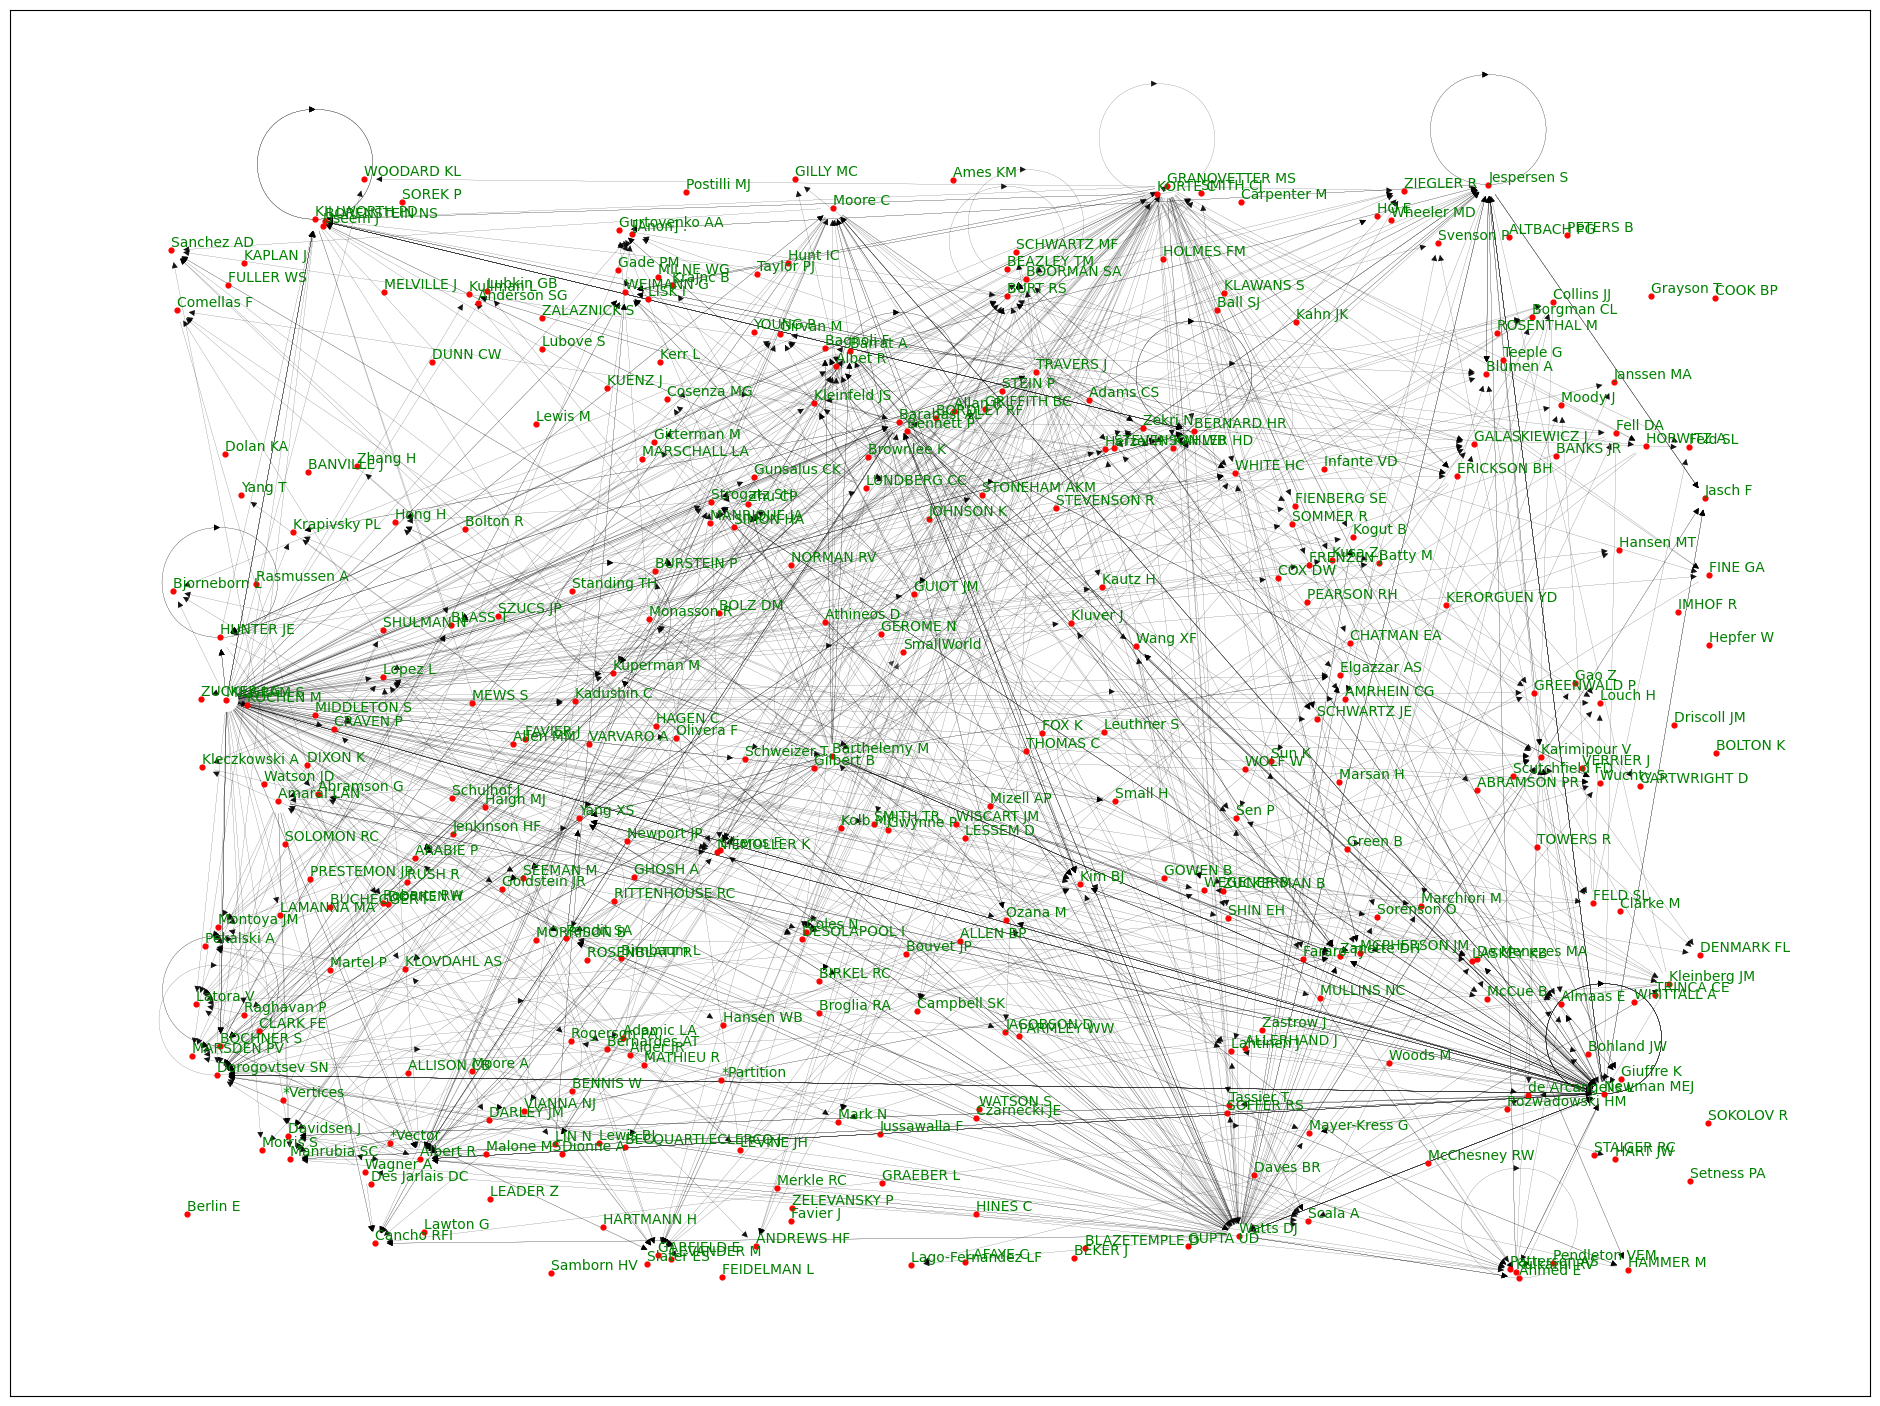

In [208]:
draw_graph(graph=graph, 
           sizex=24, 
           sizey=18, 
           line_width=.08, 
           opacity=.7, 
           plt_type='r', 
           labels=True, 
           color_node=False, 
           is_tree=False)

## Grafo completo das citações de artigos no layout circular

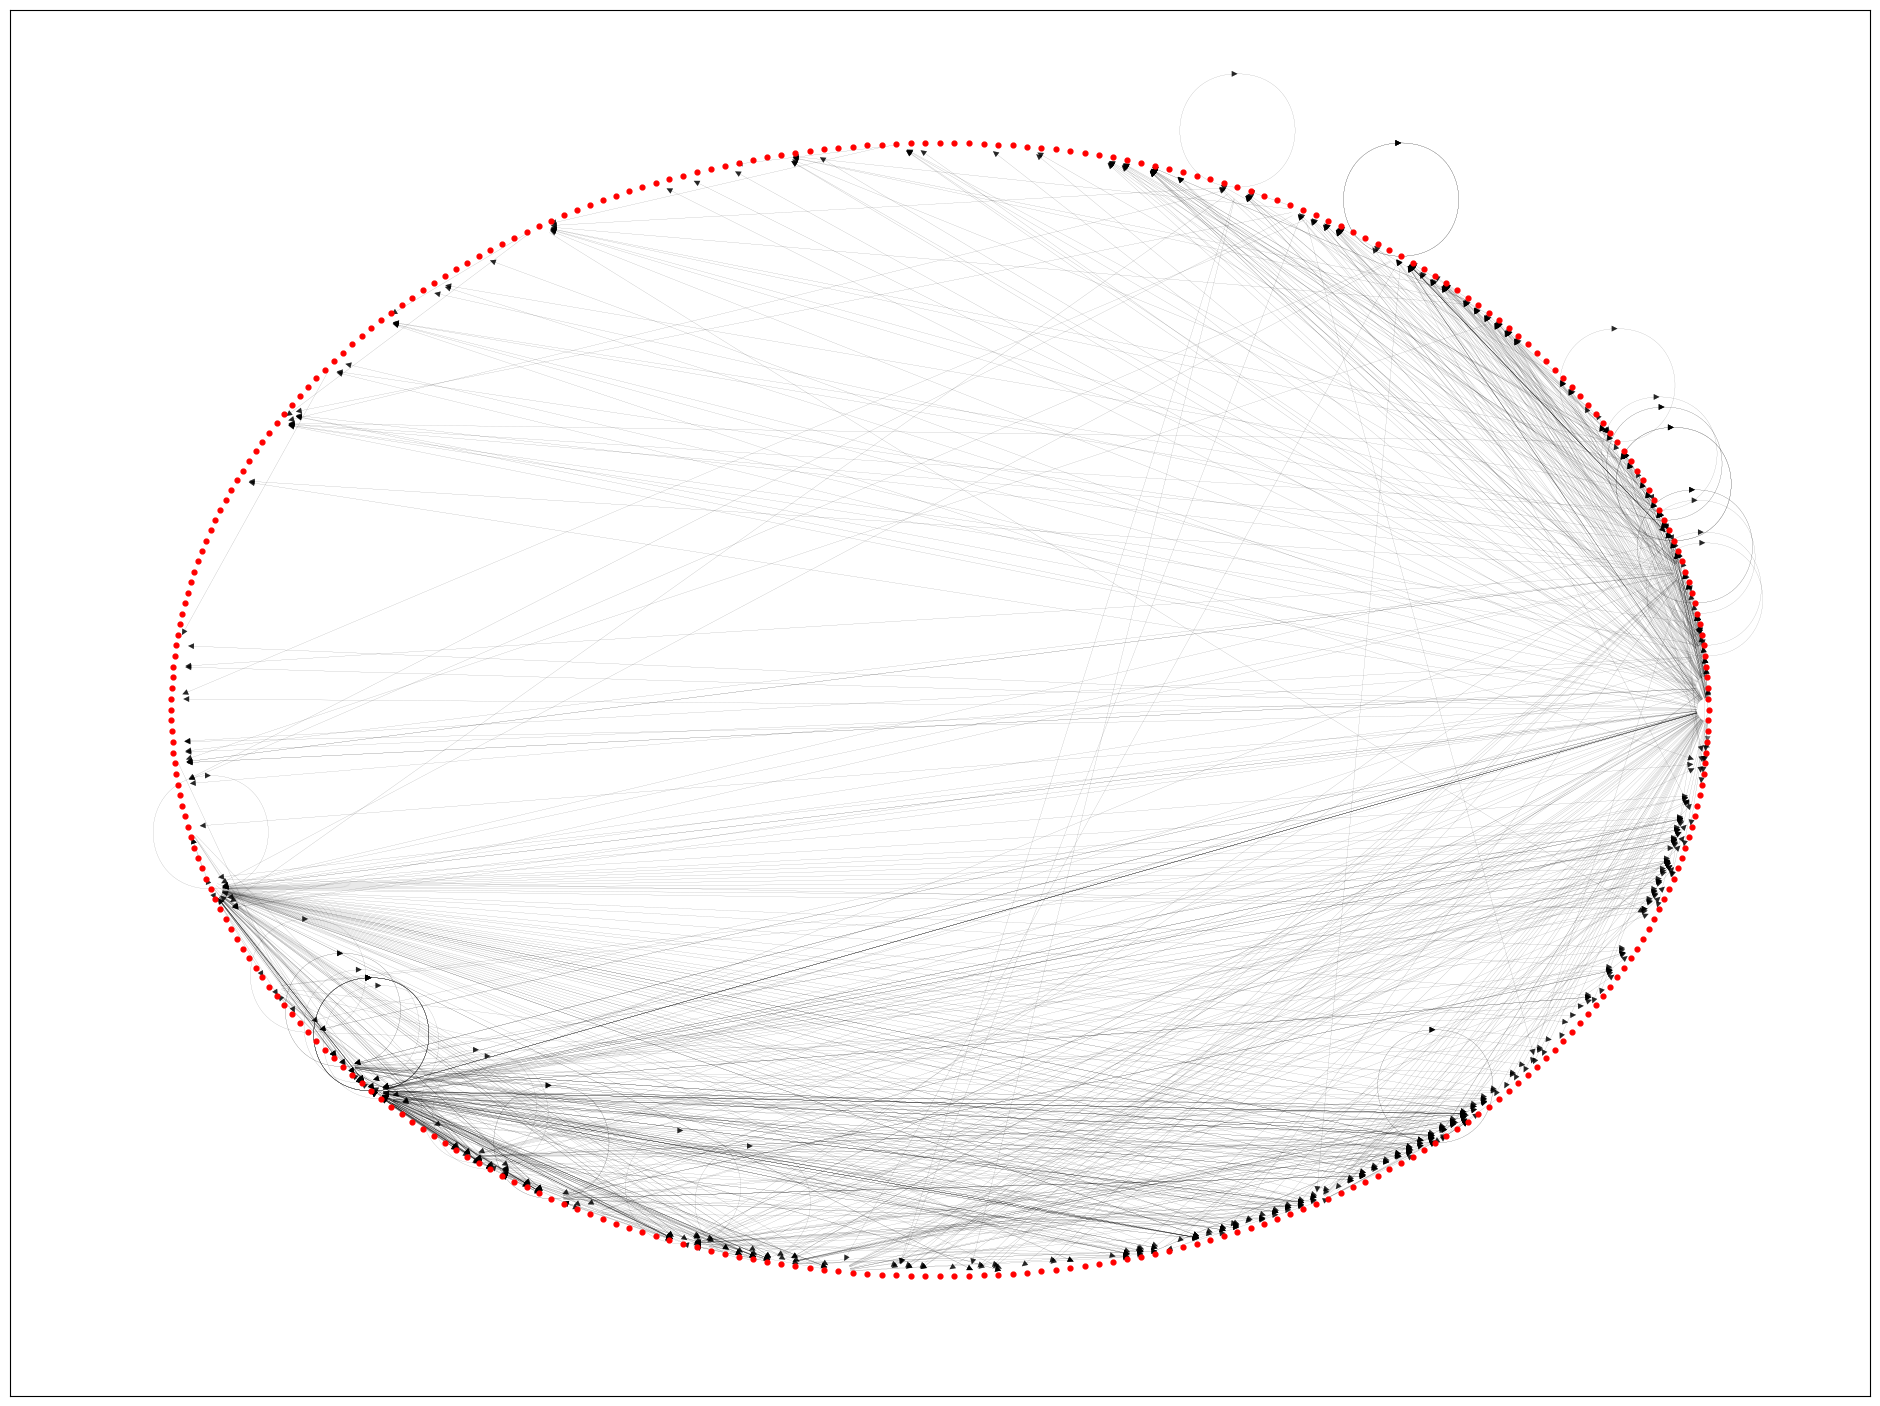

In [209]:
draw_graph(graph=graph, 
           sizex=24, 
           sizey=18, 
           line_width=.05, 
           opacity=.6, 
           plt_type='c', 
           labels=None, 
           color_node=False, 
           is_tree=False)

## Grafo completo das citações de artigos com coloração

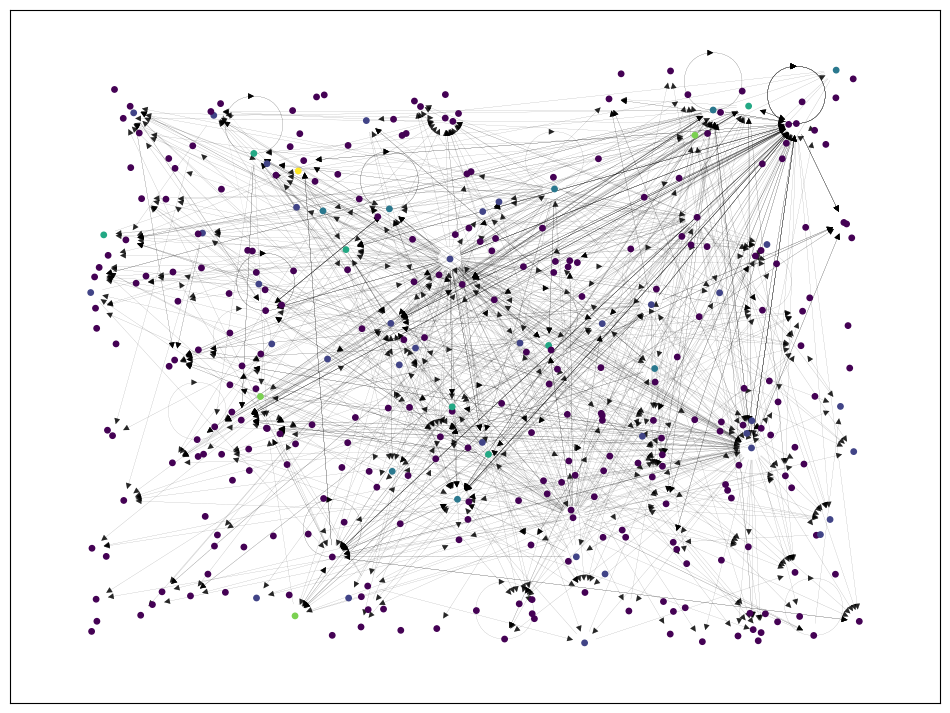

In [196]:
draw_graph(graph=graph, 
           sizex=12, 
           sizey=9, 
           line_width=.05, 
           opacity=.6, 
           plt_type='r', 
           labels=None, 
           color_node=True, 
           is_tree=False)

# Explorando o grafo

In [210]:
print('Number of nodes: ' + str(nx.number_of_nodes(graph)))
print('Number of arcs: ' + str(nx.number_of_edges(graph)))
print('Number of loops: ' + str(nx.number_of_selfloops(graph)))

Number of nodes: 332
Number of arcs: 1992
Number of loops: 76


In [199]:
isolated_nodes = [node for node, degree in graph.degree() if degree == 0]

# Número de vértices isolados
len(isolated_nodes)

151

In [183]:
# Número de componentes fortemente conexos
nx.number_strongly_connected_components(graph)

304

In [184]:
# Número de componentes semifortemente conexos
nx.number_weakly_connected_components(graph)

153

In [201]:
weakly_connected = nx.weakly_connected_components(graph)

# Calculate the size of each component
component_sizes = [len(component) for component in weakly_connected]

# Get the size of the largest weakly connected component
max(component_sizes)

178

In [155]:
# O caminho mais longo possível do grafo
nx.dag_longest_path_length(nx.condensation(graph))

11

/tmp/ipykernel_134924/1185212620.py:11: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(graph, prog="twopi")
/tmp/ipykernel_134924/1185212620.py:13: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(graph, prog="dot")


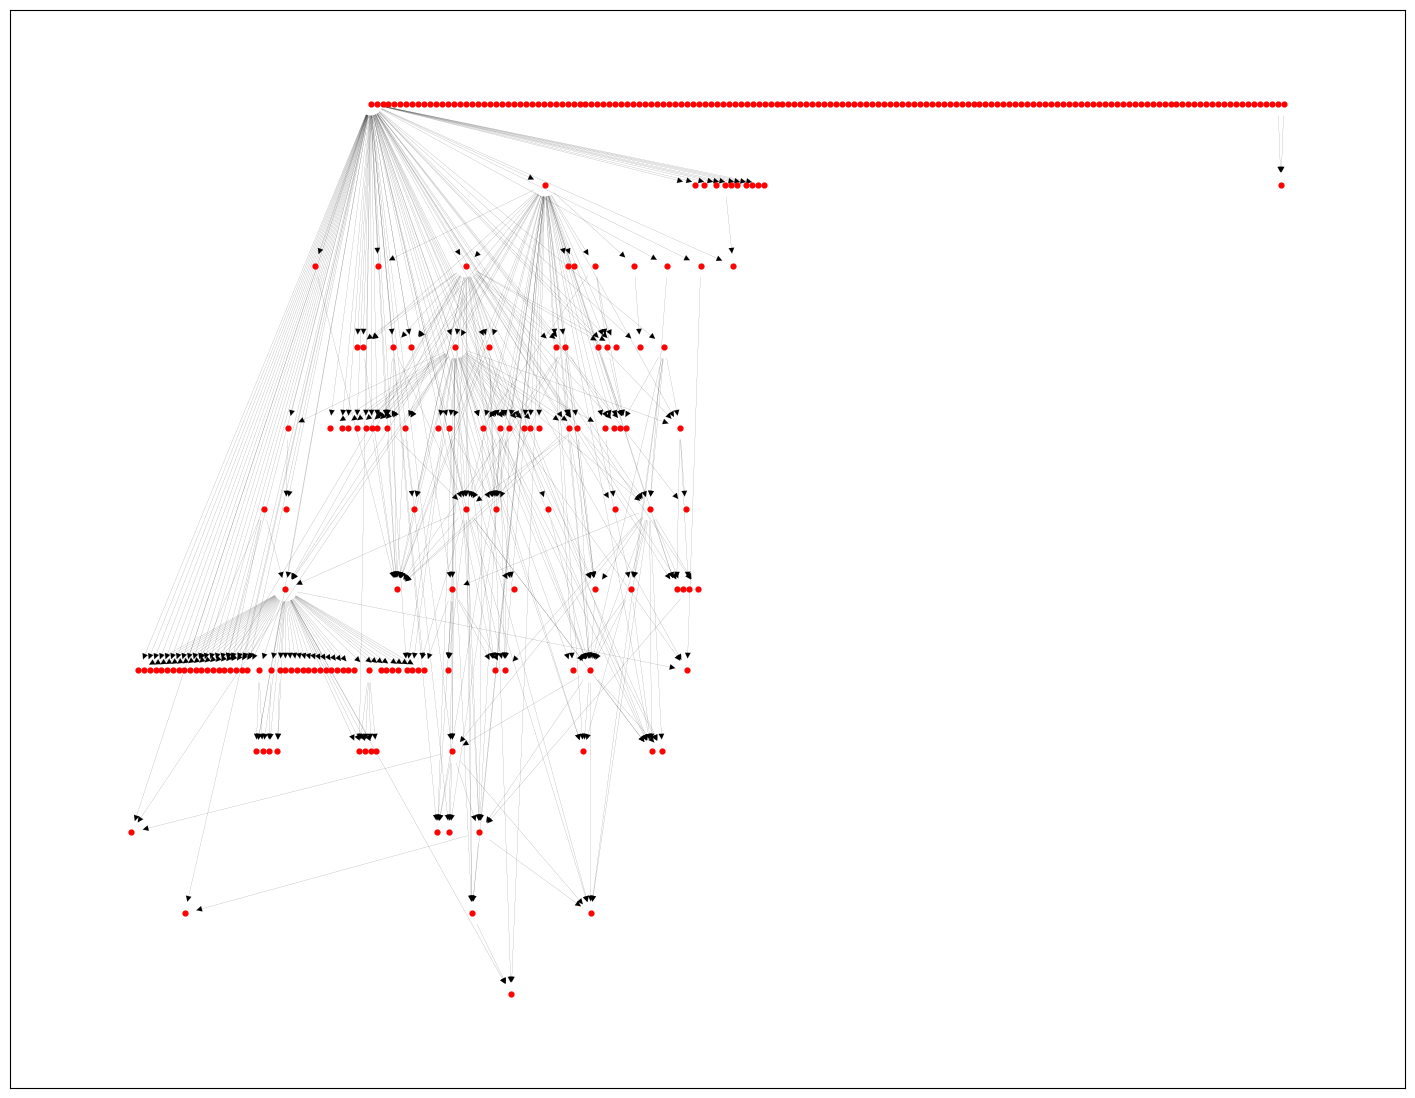

In [251]:
# Remove arestas paralelas e laços e plota como uma AGM
draw_graph(graph=nx.condensation(graph), 
           sizex=18, 
           sizey=14, 
           line_width=.07, 
           opacity=1, 
           plt_type='t', 
           labels=None, 
           color_node=False, 
           is_tree=True)

In [229]:
# Coloração máxima do grafo
coloring = nx.greedy_color(graph)
max_coloring = max(coloring.values())
max_coloring

5

In [202]:
indegrees = dict(graph.in_degree())

# Find the highest indegree
print(max(indegrees.values()))

110


In [203]:
outdegrees = dict(graph.out_degree())

# Find the highest outdegree
print(max(outdegrees.values()))

294


# Problema

In [211]:
res = nx.dfs_tree(graph, 'Newman MEJ', 3)

In [212]:
authors_array = [] # Array de autores citados

for i in res.nodes:
    authors_array.append({"node": i, "indegree": graph.in_degree(i)})

# Ordena array de autores pela chave "indegree" da maior (mais citado) para o menor
ordered_authors_array = sorted(authors_array, reverse=True, key=lambda x: x["indegree"])
ordered_authors_array

[{'node': 'Newman MEJ', 'indegree': 110},
 {'node': 'Dorogovtsev SN', 'indegree': 74},
 {'node': 'Albert R', 'indegree': 64},
 {'node': 'Jespersen S', 'indegree': 50},
 {'node': 'Zanette DH', 'indegree': 48},
 {'node': 'Kim BJ', 'indegree': 42},
 {'node': 'Yang XS', 'indegree': 34},
 {'node': 'Karimipour V', 'indegree': 28},
 {'node': 'Strogatz SH', 'indegree': 26},
 {'node': 'Cancho RFI', 'indegree': 24},
 {'node': 'Watts DJ', 'indegree': 24},
 {'node': 'Davidsen J', 'indegree': 22},
 {'node': 'Almaas E', 'indegree': 22},
 {'node': 'Kuperman M', 'indegree': 22},
 {'node': 'Barabasi AL', 'indegree': 22},
 {'node': 'Manrubia SC', 'indegree': 20},
 {'node': 'Pandit SA', 'indegree': 20},
 {'node': 'Latora V', 'indegree': 18},
 {'node': 'Jasch F', 'indegree': 18},
 {'node': 'Moore C', 'indegree': 18},
 {'node': 'Scala A', 'indegree': 16},
 {'node': 'Lopez L', 'indegree': 16},
 {'node': 'Blumen A', 'indegree': 16},
 {'node': 'Elgazzar AS', 'indegree': 16},
 {'node': 'Zekri N', 'indegree': 1

In [142]:
# Seleciona os 5 primeiros autores do array
related_authors = []

n = 5
first_n_authors = ordered_authors_array[:n]

first_n_authors

[{'node': 'Newman MEJ', 'indegree': 110},
 {'node': 'Dorogovtsev SN', 'indegree': 74},
 {'node': 'Albert R', 'indegree': 64},
 {'node': 'Jespersen S', 'indegree': 50},
 {'node': 'Zanette DH', 'indegree': 48}]

/tmp/ipykernel_134924/1185212620.py:11: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(graph, prog="twopi")


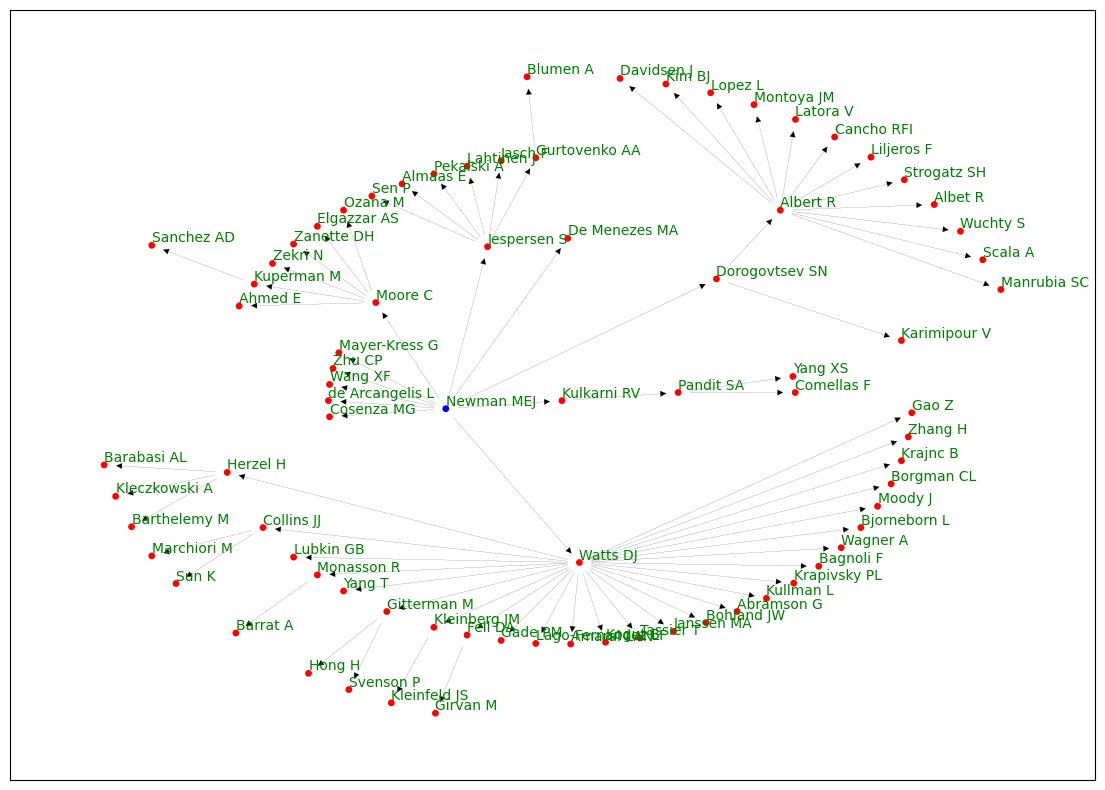

In [249]:
draw_graph(graph=res,
           sizex=14, 
           sizey=10, 
           line_width=.1, 
           opacity=1, 
           plt_type='t', 
           labels=True, 
           color_node=True, 
           is_tree=False)

# Integração com o Google Acadêmico utilizando a *serpapi*

In [112]:
from serpapi import GoogleSearch

organic_results = []

for author in first_n_authors:
    params = {
      "engine": "google_scholar",
      "q": f"Small {author}",
      "api_key": "6900080f4bad893fbc6f52e493610acd3994ea5f4e1c9c52cabea2a774dabd63"
    }

    search = GoogleSearch(params)
    results = search.get_dict()
    organic_results.append(results["organic_results"])

In [113]:
organic_results

[[{'position': 0,
   'title': 'Temporal characterisation of the network of Danish cattle movements and its implication for disease control: 2000–2009',
   'result_id': 'nsc6eYie5KQJ',
   'link': 'https://www.sciencedirect.com/science/article/pii/S0167587713000640',
   'snippet': '… This heterogeneity was partly attributable to the disassortative mixing pattern seen in the networks where low degree nodes had a tendency to preferentially attach to others with already …',
   'publication_info': {'summary': 'MM Mweu, G Fournié, T Halasa, N Toft… - Preventive veterinary …, 2013 - Elsevier',
    'authors': [{'name': 'MM Mweu',
      'link': 'https://scholar.google.com/citations?user=az237d4AAAAJ&hl=en&oi=sra',
      'serpapi_scholar_link': 'https://serpapi.com/search.json?author_id=az237d4AAAAJ&engine=google_scholar_author&hl=en',
      'author_id': 'az237d4AAAAJ'},
     {'name': 'G Fournié',
      'link': 'https://scholar.google.com/citations?user=GqLgepAAAAAJ&hl=en&oi=sra',
      'serpapi_

In [132]:
j = 0

print('\033[1m Suggested Aticles \033[0m\n')
for result in organic_results:
    for k in range(0, 2):
        print('\033[1m AUTHOR: \033[0m' + str(first_n_authors[j]['node']))
        print('\033[1m Title: \033[0m' + result[k]['title'])
        print('\033[1m Link: \033[0m' + result[k]['link'])
        print('\033[1m Snippet: \033[0m' + result[k]['snippet'])
        print('\n\n')
    
    j += 1

 Suggested Aticles 

 AUTHOR: Newman MEJ
 Title: Temporal characterisation of the network of Danish cattle movements and its implication for disease control: 2000–2009
 Link: https://www.sciencedirect.com/science/article/pii/S0167587713000640
 Snippet: … This heterogeneity was partly attributable to the disassortative mixing pattern seen in the networks where low degree nodes had a tendency to preferentially attach to others with already …



 AUTHOR: Newman MEJ
 Title: Static network analysis of a pork supply chain in Northern Germany—Characterisation of the potential spread of infectious diseases via animal movements
 Link: https://www.sciencedirect.com/science/article/pii/S0167587713000287
 Snippet: … concerning the random removal of nodes. But by strategic … from the others by only a short distance, so they could be … (in-degree) ranged between 0 and 16 (median in-degree = 1)…



 AUTHOR: Dorogovtsev SN
 Title: Scaling properties of scale-free evolving networks: Continuous approach

## Salva resultados de pesquisa no formato json

In [144]:
import json

In [145]:
file_path = "output.json"

# Write the dictionary to a JSON file
with open(file_path, "w") as json_file:
    json.dump(organic_results, json_file, indent=4)

# Rascunho

In [ ]:
# list(graph.out_edges('Gurtovenko AA'))
# graph.out_degree('Gurtovenko AA')
# list(graph.neighbors('Gurtovenko AA'))
# nx.is_empty(graph)

def draw_graph(graph, sizex, sizey, line_width, opacity, plt_type, labels, color_node):
    # Figure size
    plt.figure(figsize=(sizex, sizey))

    # Pos
    # pos = nx.kamada_kawai_layout(graph)
    # pos = nx.spring_layout(graph)
    if plt_type == 'r': 
        pos = nx.random_layout(graph) # I like this one
    if plt_type == 'c': 
        pos = nx.circular_layout(graph)
    if plt_type == 't':
        pos = graphviz_layout(graph, prog="twopi")  
#         pos = graphviz_layout(graph, prog="dot")  

    # pos = nx.bipartite_layout(graph, 1) # Does not work yet
    # pos = nx.shell_layout(graph)
    # pos = nx.spectral_layout(graph)
    # pos = nx.spiral_layout(graph)
    # pos = nx.multipartite_layout(graph)

    # Node options
    node_options = {"node_color": "red", "node_size": 12}

    if (color_node):
        i = 0
        color_map = []
        for node in graph:
            if i == 0:
                color_map.append('blue')
            else:
                color_map.append('red')
            i += 1
        node_options = {"node_color": color_map, "node_size": 15}
    
    # Edge options
    edge_options = {"width": line_width, "alpha": opacity, "edge_color": "black"}

    # Node label options
    node_label_options = { "font_size": 10,
                           "font_color": "green",
                           "verticalalignment": "bottom",
                           "horizontalalignment": "left"}

    # Edge label options
    # edge_label_options = { "font_size": 5,
    #                        "font_color": "green",
    #                        "verticalalignment": "bottom",
    #                        "horizontalalignment": "left"}

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, **node_options)

    # Draw edges
    nx.draw_networkx_edges(graph, pos, **edge_options)

    if labels != None:
        # Draw node labels
        nx.draw_networkx_labels(graph, pos, **node_label_options)

    # Draw edge labels
    # nx.draw_networkx_edge_labels(graph, pos, **edge_label_options)

    plt.show()

# Tips to draw large graphs
- Set figure size using `plt.figure(figsize=(12, 10)` from *matplotlib.pyplot*

- Set `pos = nx.draw_kamada_kawai(graph)`

- Set how nodes should appear with dictionary. I can be called `node_options`. This will be passed to the *networkx* function `nx.draw_networkx_nodes`

- Set how your edges should appear with `edge_options`. It will be passed to `nx.draw_networkx_edges`

- Call the `plt.show()` function from *matplotlib.pyplot*